In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [32]:
os.getcwd()


'C:\\Users\\Admin\\Downloads\\vendor_perf_analysis'

In [33]:
os.listdir("data")


['.ipynb_checkpoints',
 'begin_inventory.csv',
 'end_inventory.csv',
 'inventory.db',
 'purchases.csv',
 'purchase_prices.csv',
 'sales.csv',
 'vendor_invoice.csv',
 'vendor_sales_summary.csv']

In [5]:
df_sales = pd.read_csv("data/vendor_sales_summary.csv")
df_sales.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [6]:
df_sales.shape


(10692, 18)

In [7]:
df_sales.columns


Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollars', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [8]:
df_sales.info

<bound method DataFrame.info of        VendorNumber                VendorName  Brand  \
0              1128         BROWN-FORMAN CORP   1233   
1              4425     MARTIGNETTI COMPANIES   3405   
2             17035         PERNOD RICARD USA   8068   
3              3960  DIAGEO NORTH AMERICA INC   4261   
4              3960  DIAGEO NORTH AMERICA INC   3545   
...             ...                       ...    ...   
10687          9815            WINE GROUP INC   8527   
10688          8004            SAZERAC CO INC   5683   
10689          3924  HEAVEN HILL DISTILLERIES   9123   
10690          3960  DIAGEO NORTH AMERICA INC   6127   
10691          7245      PROXIMO SPIRITS INC.   3065   

                       Description  PurchasePrice  ActualPrice  Volume  \
0          Jack Daniels No 7 Black          26.27        36.99  1750.0   
1            Tito's Handmade Vodka          23.19        28.99  1750.0   
2                 Absolut 80 Proof          18.24        24.99  1750.0   

In [9]:
df_sales.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,3077.482136,18793.783627,4.223907e+04,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,10952.851391,44952.773386,1.676553e+05,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000,0.000000e+00,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,33.000000,289.710000,7.292200e+02,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,261.000000,2857.800000,5.298045e+03,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073824e+04,1929.250000,16059.562500,2.839692e+04,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,334939.000000,672819.310000,5.101920e+06,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


In [10]:
df_sales[["TotalSalesDollars", "TotalPurchaseDollars", "GrossProfit"]].head()


,TotalSalesDollars,TotalPurchaseDollars,GrossProfit
0,5101919.51,3811251.60,1290667.91
1,4819073.49,3804041.22,1015032.27
2,4538120.60,3418303.68,1119816.92
3,4475972.88,3261197.94,1214774.94
4,4223107.62,3023206.01,1199901.61


In [35]:
df_sales.isnull().sum()#.sort_values(ascending=False)

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesPrice          0
TotalSalesDollars        0
TotalExciseTax           0
FreightCost              0
GrossProfit              0
ProfitMargin             0
StockTurnover            0
SalestoPurchaseRatio     0
dtype: int64

Create Vendor KPI Summary Table


In [11]:
vendor_kpi = (
    df_sales
    .groupby("VendorName")
    .agg(
        Total_Sales=("TotalSalesDollars", "sum"),
        Total_Purchase=("TotalPurchaseDollars", "sum"),
        Total_Gross_Profit=("GrossProfit", "sum"),
        Total_Sales_Qty=("TotalSalesQuantity", "sum"),
        Total_Purchase_Qty=("TotalPurchaseQuantity", "sum")
    )
    .reset_index()
)



In [15]:
vendor_kpi.head()


,VendorName,Total_Sales,Total_Purchase,Total_Gross_Profit,Total_Sales_Qty,Total_Purchase_Qty
0,AAPER ALCOHOL & CHEMICAL CO,0.00,105.07,-105.07,0.0,1
1,ADAMBA IMPORTS INTL INC,67576.22,76770.25,-9194.03,3978.0,4732
2,ALISA CARR BEVERAGES,113590.18,34951.68,78638.50,982.0,438
3,ALTAMAR BRANDS LLC,15706.81,11706.20,4000.61,319.0,332
4,AMERICAN SPIRITS EXCHANGE,1719.97,1205.16,514.81,103.0,132
5,AMERICAN VINTAGE BEVERAGE,190134.63,156357.28,33777.35,14637.0,15778


In [ ]:
#Rank Vendors by Performance

top_profit_vendors = vendor_kpi.sort_values(
    by="Total_Gross_Profit", ascending=False
).head(10)

top_profit_vendors


#These vendors contribute the maximum profit to the company.

In [16]:
loss_vendors = vendor_kpi.sort_values(
    by="Total_Gross_Profit", ascending=True
).head(10)

loss_vendors

#These vendors may need price renegotiation, volume optimization, or discontinuation.

,VendorName,Total_Sales,Total_Purchase,Total_Gross_Profit,Total_Sales_Qty,Total_Purchase_Qty
1,ADAMBA IMPORTS INTL INC,67576.22,76770.25,-9194.03,3978.0,4732
10,BLACK COVE BEVERAGES,6256.87,14465.06,-8208.19,313.0,919
119,VINEYARD BRANDS LLC,4323.96,10951.51,-6627.55,104.0,371
48,"IRA GOLDMAN AND WILLIAMS, LLP",1265.58,5630.88,-4365.30,42.0,328
45,HIGHLAND WINE MERCHANTS LLC,1533.68,5500.32,-3966.64,82.0,372
115,UNCORKED,1091.39,2966.31,-1874.92,61.0,243
42,GILMANTON WINERY & VINEYARD,3837.60,5393.04,-1555.44,240.0,516
57,LOYAL DOG WINERY,1111.26,2320.80,-1209.54,74.0,240
107,TAMWORTH DISTILLING,40021.12,41036.44,-1015.32,1488.0,1990
6,APPOLO VINEYARDS LLC,1616.92,2399.70,-782.78,108.0,230


In [17]:
# Add Profit Margin KPI 

vendor_kpi["Profit_Margin_%"] = (
    vendor_kpi["Total_Gross_Profit"] / vendor_kpi["Total_Sales"]
) * 100


In [18]:
vendor_kpi["Profit_Margin_%"] = vendor_kpi["Profit_Margin_%"].fillna(0)


In [19]:
vendor_kpi[["VendorName", "Profit_Margin_%"]].head()


,VendorName,Profit_Margin_%
0,AAPER ALCOHOL & CHEMICAL CO,-inf
1,ADAMBA IMPORTS INTL INC,-13.605422
2,ALISA CARR BEVERAGES,69.230016
3,ALTAMAR BRANDS LLC,25.470544
4,AMERICAN SPIRITS EXCHANGE,29.931336


In [20]:
#High Sales but Low Profit

high_sales_low_profit = vendor_kpi[
    (vendor_kpi["Total_Sales"] > vendor_kpi["Total_Sales"].median()) &
    (vendor_kpi["Profit_Margin_%"] < vendor_kpi["Profit_Margin_%"].median())
]

high_sales_low_profit.head()


,VendorName,Total_Sales,Total_Purchase,Total_Gross_Profit,Total_Sales_Qty,Total_Purchase_Qty,Profit_Margin_%
5,AMERICAN VINTAGE BEVERAGE,190134.63,156357.28,33777.35,14637.0,15778,17.764965
16,CALEDONIA SPIRITS INC,278648.38,259604.70,19043.68,7162.0,8202,6.834305
17,CAMPARI AMERICA,5604628.17,4141720.71,1462907.46,490283.0,501284,26.101775
28,DIAGEO NORTH AMERICA INC,68739834.97,50959796.85,17780038.12,5422335.0,5459788,25.865698
31,DUGGANS DISTILLED PRODUCTS,202338.62,184296.50,18042.12,15738.0,18814,8.916795


In [21]:
vendor_kpi.to_csv("vendor_kpi_summary.csv", index=False)


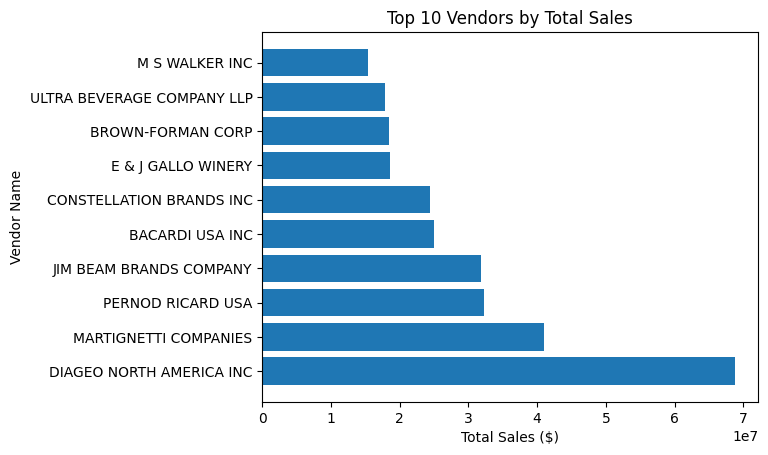

In [23]:
top_vendors = vendor_kpi.sort_values(by="Total_Sales", ascending=False).head(10)

plt.figure()
plt.barh(top_vendors["VendorName"], top_vendors["Total_Sales"])
plt.xlabel("Total Sales ($)")
plt.ylabel("Vendor Name")
plt.title("Top 10 Vendors by Total Sales")
plt.show()


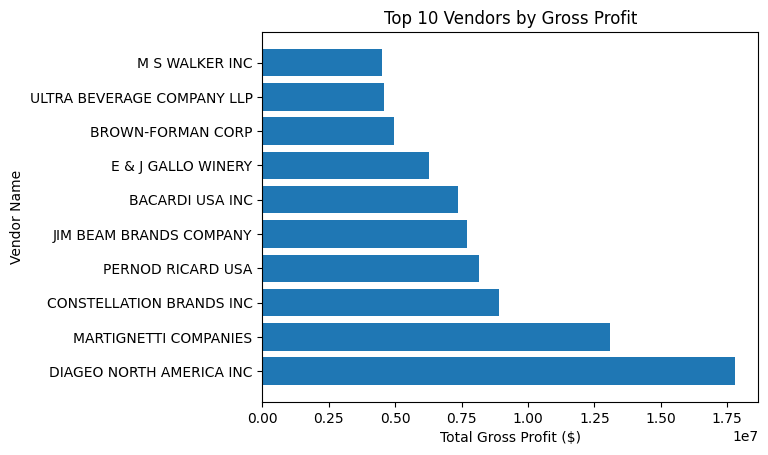

'High-profit vendors are not always the highest-sales vendors\n\nProfit-focused vendor strategy is different from sales-focused stra'

In [25]:
top_profit_vendors = vendor_kpi.sort_values(
    by="Total_Gross_Profit", ascending=False
).head(10)

plt.figure()
plt.barh(top_profit_vendors["VendorName"], top_profit_vendors["Total_Gross_Profit"])
plt.xlabel("Total Gross Profit ($)")
plt.ylabel("Vendor Name")
plt.title("Top 10 Vendors by Gross Profit")
plt.show()


'''High-profit vendors are not always the highest-sales vendors

Profit-focused vendor strategy is different from sales-focused stra'''


In [27]:
'''Filter loss-making vendors'''

loss_vendors = vendor_kpi[vendor_kpi["Total_Gross_Profit"] < 0]


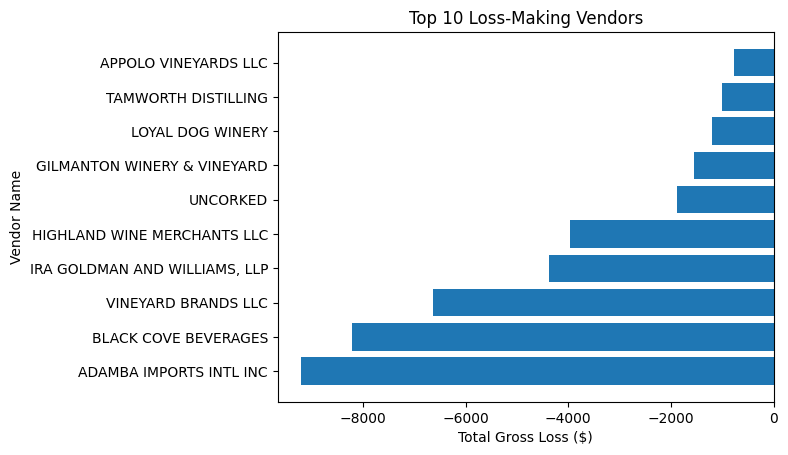

In [28]:
''' Top 10 loss-making vendors'''

top_loss_vendors = loss_vendors.sort_values(
    by="Total_Gross_Profit"
).head(10)

plt.figure()
plt.barh(top_loss_vendors["VendorName"], top_loss_vendors["Total_Gross_Profit"])
plt.xlabel("Total Gross Loss ($)")
plt.ylabel("Vendor Name")
plt.title("Top 10 Loss-Making Vendors")
plt.show()

'''
Some vendors generate consistent losses

These vendors should be reviewed or discontinued

Losses may be due to:
  High purchase price
  Low sales volume
  High freight or excise tax
'''

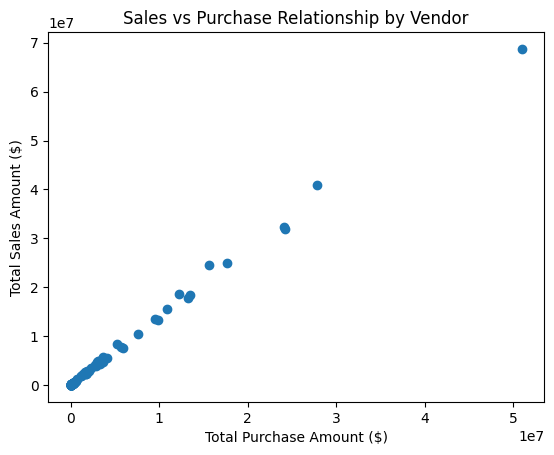

'\n1.Positive trend → good purchase planning\n\n2.Dots far above line → highly profitable vendors\n\n3.Dots below → inefficient or loss-making vendors\n\n4.Outliers indicate vendor risk or opportunity\n'

In [29]:
plt.figure()
plt.scatter(
    vendor_kpi["Total_Purchase"],
    vendor_kpi["Total_Sales"]
)
plt.xlabel("Total Purchase Amount ($)")
plt.ylabel("Total Sales Amount ($)")
plt.title("Sales vs Purchase Relationship by Vendor")
plt.show()

'''
1.Positive trend → good purchase planning

2.Dots far above line → highly profitable vendors

3.Dots below → inefficient or loss-making vendors

4.Outliers indicate vendor risk or opportunity
'''

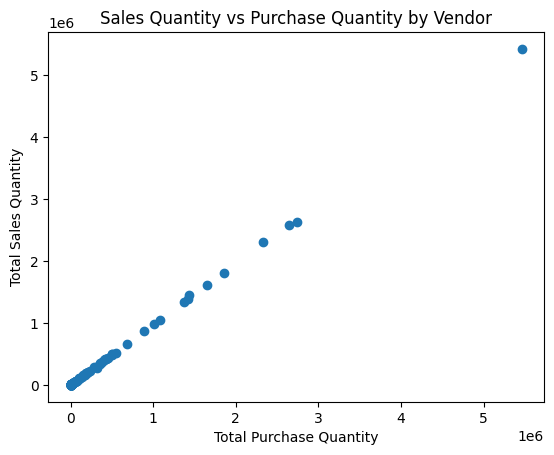

'\n1.Points near diagonal → healthy stock movement\n\n2.Below diagonal → excess inventory\n\n3.Above diagonal → demand exceeding supply (opportunity)\n'

In [30]:
plt.figure()
plt.scatter(
    vendor_kpi["Total_Purchase_Qty"],
    vendor_kpi["Total_Sales_Qty"]
)
plt.xlabel("Total Purchase Quantity")
plt.ylabel("Total Sales Quantity")
plt.title("Sales Quantity vs Purchase Quantity by Vendor")
plt.show()

'''
1.Points near diagonal → healthy stock movement

2.Below diagonal → excess inventory

3.Above diagonal → demand exceeding supply (opportunity)
'''

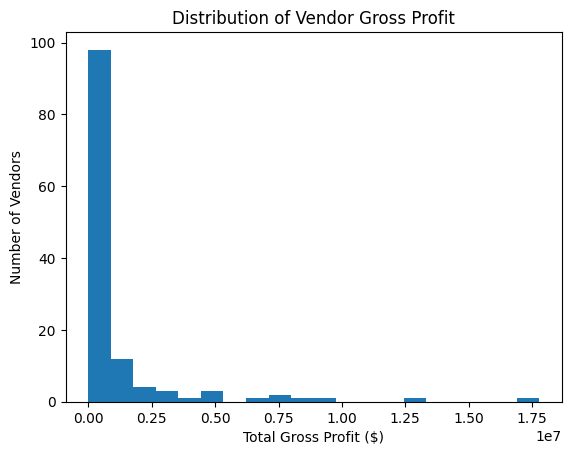

'\nLeft tail → loss-making vendors\n\nRight tail → high-performing vendors\n\nSkewness indicates profit concentration risk\n'

In [36]:
plt.figure()
plt.hist(vendor_kpi["Total_Gross_Profit"], bins=20)
plt.xlabel("Total Gross Profit ($)")
plt.ylabel("Number of Vendors")
plt.title("Distribution of Vendor Gross Profit")
plt.show()

'''
Left tail → loss-making vendors

Right tail → high-performing vendors

Skewness indicates profit concentration risk
'''